In [356]:
import mlflow
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
sns.set()

import sys
sys.path.append('../')

mlflow.set_tracking_uri('http://localhost:5001')

In [357]:
runs = mlflow.search_runs(filter_string=f"tags.type_of_run = 'varying_number_of_labels'",
                                           run_view_type=mlflow.tracking.client.ViewType.ACTIVE_ONLY,
                                           experiment_ids=['1', '2'])

In [358]:
best_full_supervised = mlflow.search_runs(experiment_ids=['2'], 
                                          run_view_type=mlflow.tracking.client.ViewType.ACTIVE_ONLY)

In [359]:
best_full_supervised_acc = best_full_supervised['metrics.acc_top1'].max()
best_full_supervised_acc

99.6875

In [360]:
grouped_max = runs.groupby(['experiment_id', 'params.n_labels_train'])['metrics.acc_top1'].agg([max, min, 'mean'])
grouped_max = grouped_max.stack()
grouped_max = grouped_max.rename('value')
grouped_max.index = grouped_max.index.rename('agg', level=2)
grouped_max = grouped_max.reset_index()

In [361]:
grouped_max['params.n_labels_train'] = grouped_max['params.n_labels_train'].astype(int)
grouped_max['experiment_id'] = grouped_max['experiment_id'].map({'1': 'mix-match', '2': 'transfer learning'})


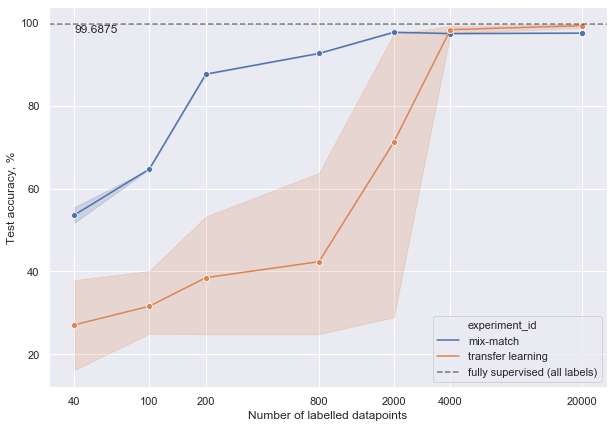

In [362]:
fig, ax = plt.subplots(1, 1, figsize = (10, 7))

sns.lineplot(x="params.n_labels_train", y="value", hue="experiment_id",
             data=grouped_max.reset_index(), marker='o', ax=ax)
ax.set_xscale('log')
ax.set_xticks(sorted(grouped_max['params.n_labels_train'].unique()))
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.axhline(best_full_supervised_acc, alpha=0.5, color='black', linestyle='--', label='fully supervised (all labels)')
ax.text(40, best_full_supervised_acc-2, f'{best_full_supervised_acc}')
ax.set_xlabel('Number of labelled datapoints')
ax.set_ylabel('Test accuracy, %')
plt.legend()